## Libraries

In [1]:
# Import Libarary

# data analysis
import numpy as np
import pandas as pd

# data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# modeling
import tensorflow as tf
import tensorflow.keras as keras

# set seed
import random


In [2]:
# set seed
random.seed(123)
np.random.seed(123)
tf.random.set_seed(123)

In [3]:
# Open csv file
df = pd.read_csv('dataset/tweetlabels1000_labeled.xlsx - Sheet2.csv')

In [4]:
df

,No,Label,Username,Tweet
0,0,none,chyrisalys,wifi watcha pasti indihome
1,1,indirect complaint,woiidal,indihome ada masalah apasih??!!
2,2,remark,ranieaw,sore sore hujan rebahan bareng bocil nonton nu...
3,3,negative remark,daeguv_,"indihome plis untuk tanggal 10,13 jangan kesur..."
4,4,indirect complaint,fiorincha,INDIHOME NGAPASIIII
...,...,...,...,...
998,998,campaign,sangwarior,Bisa sharing bareng sobat indihome gini kan as...
999,999,campaign,sangwarior,Sekarang nyantai dulu bentar sambil scroll sos...
1000,1000,negative remark,untextend,@JefriHandri Sini indihome down dr semalem jam...
1001,1001,campaign,sangwarior,Ini barusan slesei sob... Lumayan buat nyari k...


## Preprocessing

In [5]:
# drop rows with label = campaign, own tweet, & incomplete
df = df.loc[~df['Label'].isin(['campaign','own tweet','incomplete'])].copy()
df

,No,Label,Username,Tweet
0,0,none,chyrisalys,wifi watcha pasti indihome
1,1,indirect complaint,woiidal,indihome ada masalah apasih??!!
2,2,remark,ranieaw,sore sore hujan rebahan bareng bocil nonton nu...
3,3,negative remark,daeguv_,"indihome plis untuk tanggal 10,13 jangan kesur..."
4,4,indirect complaint,fiorincha,INDIHOME NGAPASIIII
...,...,...,...,...
994,994,inquiry,pecintamochi,"@IndiHomeCare Min, kalo jatuh tempo pembayaran..."
995,995,inquiry,tetehaisyah51,"@IndiHomeCare Min, 1 IndiHome TV bisa gak berl..."
997,997,direct complaint,untextend,@IndiHomeCare @fauzindrianto Dari semalem down...
1000,1000,negative remark,untextend,@JefriHandri Sini indihome down dr semalem jam...


In [6]:
# Label Encoding
df['label-encoded'] = df['Label'].map({'indirect complaint': 0, 'remark': 1, 'negative remark': 2, 'direct compliment' : 3 , 'direct complaint' : 4, 'none' : 5, 'inquiry' : 6})
df

,No,Label,Username,Tweet,label-encoded
0,0,none,chyrisalys,wifi watcha pasti indihome,5
1,1,indirect complaint,woiidal,indihome ada masalah apasih??!!,0
2,2,remark,ranieaw,sore sore hujan rebahan bareng bocil nonton nu...,1
3,3,negative remark,daeguv_,"indihome plis untuk tanggal 10,13 jangan kesur...",2
4,4,indirect complaint,fiorincha,INDIHOME NGAPASIIII,0
...,...,...,...,...,...
994,994,inquiry,pecintamochi,"@IndiHomeCare Min, kalo jatuh tempo pembayaran...",6
995,995,inquiry,tetehaisyah51,"@IndiHomeCare Min, 1 IndiHome TV bisa gak berl...",6
997,997,direct complaint,untextend,@IndiHomeCare @fauzindrianto Dari semalem down...,4
1000,1000,negative remark,untextend,@JefriHandri Sini indihome down dr semalem jam...,2


In [7]:
df['text_lower'] = df['Tweet'].str.lower()
df

,No,Label,Username,Tweet,label-encoded,text_lower
0,0,none,chyrisalys,wifi watcha pasti indihome,5,wifi watcha pasti indihome
1,1,indirect complaint,woiidal,indihome ada masalah apasih??!!,0,indihome ada masalah apasih??!!
2,2,remark,ranieaw,sore sore hujan rebahan bareng bocil nonton nu...,1,sore sore hujan rebahan bareng bocil nonton nu...
3,3,negative remark,daeguv_,"indihome plis untuk tanggal 10,13 jangan kesur...",2,"indihome plis untuk tanggal 10,13 jangan kesur..."
4,4,indirect complaint,fiorincha,INDIHOME NGAPASIIII,0,indihome ngapasiiii
...,...,...,...,...,...,...
994,994,inquiry,pecintamochi,"@IndiHomeCare Min, kalo jatuh tempo pembayaran...",6,"@indihomecare min, kalo jatuh tempo pembayaran..."
995,995,inquiry,tetehaisyah51,"@IndiHomeCare Min, 1 IndiHome TV bisa gak berl...",6,"@indihomecare min, 1 indihome tv bisa gak berl..."
997,997,direct complaint,untextend,@IndiHomeCare @fauzindrianto Dari semalem down...,4,@indihomecare @fauzindrianto dari semalem down...
1000,1000,negative remark,untextend,@JefriHandri Sini indihome down dr semalem jam...,2,@jefrihandri sini indihome down dr semalem jam...


In [8]:
import re # regex
import string

In [9]:
def text_cleansing(text):
    
    # remove tags
    # text = text.replace('<provider_name>', '')
    # text = text.replace('<url>', '')
    # text = text.replace('<user_mention>', '')
    # text = text.replace('<product_name>', '')
    
    # remove non ASCII (emoticon, chinese word, etc)
    text = text.encode('ascii', 'replace').decode('ascii')
    
    # remove digits (using regex) -> subtitute
    text = re.sub('\d+', '', text)
    
    # remove punctuation, reference: https://stackoverflow.com/a/34294398
    text = text.translate(str.maketrans('', '', string.punctuation))
    
    # remove whitespace in the beginning and end of sentence
    text = text.strip()
    
    # remove extra whitespace in the middle of sentence (using regex)
    text = re.sub('\s+', ' ', text)
    
    # remove url in tweet (using regex)
    text = re.sub(r"\bhttp\w+", "", text)
    
    return text

In [10]:
# tampung hasil pembersihan di kolom yang baru
df['text_clean'] = df['text_lower'].apply(lambda x: text_cleansing(x))

In [11]:
df.at[90,'text_clean']

'seneng lihat mereka biar lancar internetnya indihome '

In [12]:
normalized_word = pd.read_csv('dataset/new_kamusalay.csv', header=None)
data_dict = dict(zip(normalized_word[0], normalized_word[1]))
len(data_dict)

15166

In [13]:
def normalize_text(text):
    return ' '.join(data_dict.get(word, word) for word in text.split())

In [14]:
df['text_normalized'] = df['text_clean'].apply(lambda x: normalize_text(x))
df

,No,Label,Username,Tweet,label-encoded,text_lower,text_clean,text_normalized
0,0,none,chyrisalys,wifi watcha pasti indihome,5,wifi watcha pasti indihome,wifi watcha pasti indihome,wifi watcha pasti indihome
1,1,indirect complaint,woiidal,indihome ada masalah apasih??!!,0,indihome ada masalah apasih??!!,indihome ada masalah apasih,indihome ada masalah apa sih
2,2,remark,ranieaw,sore sore hujan rebahan bareng bocil nonton nu...,1,sore sore hujan rebahan bareng bocil nonton nu...,sore sore hujan rebahan bareng bocil nonton nu...,sore sore hujan rebahan bareng bocah cilik men...
3,3,negative remark,daeguv_,"indihome plis untuk tanggal 10,13 jangan kesur...",2,"indihome plis untuk tanggal 10,13 jangan kesur...",indihome plis untuk tanggal jangan kesurupan,indihome tolong untuk tanggal jangan kesurupan
4,4,indirect complaint,fiorincha,INDIHOME NGAPASIIII,0,indihome ngapasiiii,indihome ngapasiiii,indihome ngapasiiii
...,...,...,...,...,...,...,...,...
994,994,inquiry,pecintamochi,"@IndiHomeCare Min, kalo jatuh tempo pembayaran...",6,"@indihomecare min, kalo jatuh tempo pembayaran...",indihomecare min kalo jatuh tempo pembayaran i...,indihomecare min kalau jatuh tempo pembayaran ...
995,995,inquiry,tetehaisyah51,"@IndiHomeCare Min, 1 IndiHome TV bisa gak berl...",6,"@indihomecare min, 1 indihome tv bisa gak berl...",indihomecare min indihome tv bisa gak berlangg...,indihomecare min indihome televisi bisa tidak ...
997,997,direct complaint,untextend,@IndiHomeCare @fauzindrianto Dari semalem down...,4,@indihomecare @fauzindrianto dari semalem down...,indihomecare fauzindrianto dari semalem down g...,indihomecare fauzindrianto dari semalam down t...
1000,1000,negative remark,untextend,@JefriHandri Sini indihome down dr semalem jam...,2,@jefrihandri sini indihome down dr semalem jam...,jefrihandri sini indihome down dr semalem jam ...,jefrihandri sini indihome down dari semalam ja...


In [15]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

# create stemmer
factory = StemmerFactory()
stemmer = factory.create_stemmer()


In [16]:
sample_text_normalized = df['text_normalized'][8]
sample_text_normalized

'ini indihome sama kartu telkomsel aku lagi bermasalah ya kok lelet banget shit mau apa susah'

In [17]:
sample_text_stemmed = stemmer.stem(sample_text_normalized)
sample_text_stemmed

'ini indihome sama kartu telkomsel aku lagi masalah ya kok lelet banget shit mau apa susah'

In [18]:
df['text_stemmed'] = df['text_normalized'].apply(lambda x: stemmer.stem(x))
df

,No,Label,Username,Tweet,label-encoded,text_lower,text_clean,text_normalized,text_stemmed
0,0,none,chyrisalys,wifi watcha pasti indihome,5,wifi watcha pasti indihome,wifi watcha pasti indihome,wifi watcha pasti indihome,wifi watcha pasti indihome
1,1,indirect complaint,woiidal,indihome ada masalah apasih??!!,0,indihome ada masalah apasih??!!,indihome ada masalah apasih,indihome ada masalah apa sih,indihome ada masalah apa sih
2,2,remark,ranieaw,sore sore hujan rebahan bareng bocil nonton nu...,1,sore sore hujan rebahan bareng bocil nonton nu...,sore sore hujan rebahan bareng bocil nonton nu...,sore sore hujan rebahan bareng bocah cilik men...,sore sore hujan rebah bareng bocah cilik tonto...
3,3,negative remark,daeguv_,"indihome plis untuk tanggal 10,13 jangan kesur...",2,"indihome plis untuk tanggal 10,13 jangan kesur...",indihome plis untuk tanggal jangan kesurupan,indihome tolong untuk tanggal jangan kesurupan,indihome tolong untuk tanggal jangan surup
4,4,indirect complaint,fiorincha,INDIHOME NGAPASIIII,0,indihome ngapasiiii,indihome ngapasiiii,indihome ngapasiiii,indihome ngapasiiii
...,...,...,...,...,...,...,...,...,...
994,994,inquiry,pecintamochi,"@IndiHomeCare Min, kalo jatuh tempo pembayaran...",6,"@indihomecare min, kalo jatuh tempo pembayaran...",indihomecare min kalo jatuh tempo pembayaran i...,indihomecare min kalau jatuh tempo pembayaran ...,indihomecare min kalau jatuh tempo bayar indih...
995,995,inquiry,tetehaisyah51,"@IndiHomeCare Min, 1 IndiHome TV bisa gak berl...",6,"@indihomecare min, 1 indihome tv bisa gak berl...",indihomecare min indihome tv bisa gak berlangg...,indihomecare min indihome televisi bisa tidak ...,indihomecare min indihome televisi bisa tidak ...
997,997,direct complaint,untextend,@IndiHomeCare @fauzindrianto Dari semalem down...,4,@indihomecare @fauzindrianto dari semalem down...,indihomecare fauzindrianto dari semalem down g...,indihomecare fauzindrianto dari semalam down t...,indihomecare fauzindrianto dari malam down tid...
1000,1000,negative remark,untextend,@JefriHandri Sini indihome down dr semalem jam...,2,@jefrihandri sini indihome down dr semalem jam...,jefrihandri sini indihome down dr semalem jam ...,jefrihandri sini indihome down dari semalam ja...,jefrihandri sini indihome down dari malam jam ...


## Exploratory Data Analysis (EDA)

#### unique words

In [20]:
from collections import Counter

# function to count unique words
def counter_word(text):
    count = Counter()
    for sentence in text.values:
        for word in sentence.split():
            count[word] += 1
    return count

# find out how many unique words in our data
unique_words = counter_word(df['text_stemmed'])
len(unique_words)

2160

In [22]:
# take a look at the five most common words
unique_words.most_common(20)

[('indihome', 776),
 ('tidak', 197),
 ('di', 163),
 ('indihomecare', 146),
 ('yang', 142),
 ('sudah', 140),
 ('ini', 134),
 ('ya', 114),
 ('pakai', 111),
 ('kalau', 101),
 ('saya', 97),
 ('bisa', 94),
 ('dan', 89),
 ('banget', 88),
 ('ada', 86),
 ('saja', 82),
 ('dari', 78),
 ('lagi', 76),
 ('hari', 67),
 ('juga', 64)]

In [23]:
# create a frequency table of word frequency
freq = [freq for word, freq in unique_words.items()]
pd.Series(freq).value_counts()

1      1264
2       275
3       146
4        89
5        56
       ... 
76        1
134       1
197       1
78        1
49        1
Length: 65, dtype: int64

In [24]:
df['text_stemmed'].apply(lambda x: len(x.split()))


0        4
1        5
2       19
3        6
4        2
        ..
994     12
995     11
997      9
1000    14
1002     5
Name: text_stemmed, Length: 722, dtype: int64

In [25]:
sentence_length = df['text_stemmed'].apply(lambda x: len(x.split()))

<AxesSubplot:xlabel='text_stemmed', ylabel='Count'>

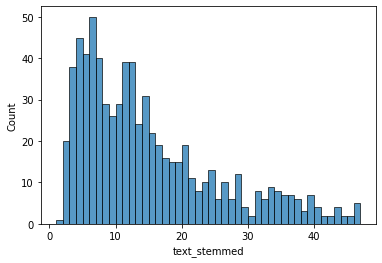

In [26]:
# seaborn
sns.histplot(sentence_length, binwidth=1)

In [27]:
# five number summary
sentence_length.describe()

count    722.000000
mean      14.429363
std       10.499514
min        1.000000
25%        6.000000
50%       12.000000
75%       20.000000
max       47.000000
Name: text_stemmed, dtype: float64

In [ ]:
from keras.preprocessing.text import Tokenizer
